In [7]:
!pip -q install datasets
!pip -q install huggingface_hub
!pip -q install chardet

## 데이터셋 다운로드

In [ ]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

instacart-market-basket-analysis.zip을 현재 디렉토리에서 압축해제 후 아래 코드블럭을 실행해주세요.

In [2]:
# datasets 디렉토리 생성
os.mkdir('./datasets')
# 현재 디렉토리 경로
current_directory = os.getcwd() + '/instacart-market-basket-analysis'

# 현재 디렉토리 내의 모든 파일을 검사
for item in os.listdir(current_directory):
    # 파일이 ZIP 파일인지 확인
    if item.endswith('.zip'):
        file_path = os.path.join(current_directory, item)
        # ZIP 파일을 열고 압축 해제
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(current_directory)
        print(f"Extracted: {file_path}")
        # shutil.move(file_path, './datasets/' + item)
        # 파일 삭제
        os.remove(file_path)

for item in os.listdir(current_directory):
    # 파일이 CSV 파일인지 확인
    if item.endswith('.csv'):
        file_path = os.path.join(current_directory, item)
        shutil.move(file_path, './datasets/' + item)

Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/order_products__prior.csv.zip
Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/order_products__train.csv.zip
Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/aisles.csv.zip
Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/orders.csv.zip
Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/departments.csv.zip
Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/products.csv.zip
Extracted: /Users/geonmin/Github/ailab_mlproject_16/박건민/instacart-market-basket-analysis/sample_submission.csv.zip


In [4]:
import pandas as pd

df_list = []

# 데이터프레임 생성
for dataset in os.listdir('./datasets'):
    globals()[dataset[:-4]] = pd.read_csv(f'./datasets/{dataset}')
    print(dataset[:-4])
    df_list.append(dataset[:-4])

products
orders
order_products__train
departments
aisles
order_products__prior
sample_submission


## EDA 

In [5]:
df_list

['products',
 'orders',
 'order_products__train',
 'departments',
 'aisles',
 'order_products__prior',
 'sample_submission']

1. **aisles.csv**:
   - `aisle_id`: 각 aisle(통로)의 고유 식별자
   - `aisle`: aisle의 이름 또는 카테고리

2. **departments.csv**:
   - `department_id`: 각 department(부서)의 고유 식별자
   - `department`: department의 이름

3. **order_products__*.csv**:
   - 이 파일들은 각 주문(order)에서 구매된 제품(product)을 지정합니다. 
   - `order_id`: 주문의 고유 식별자
   - `product_id`: 제품의 고유 식별자
   - `add_to_cart_order`: 제품이 카트에 추가된 순서
   - `reordered`: 해당 제품이 고객이 이전 주문에서 재구매되었는지 여부 (1: 재구매, 0: 처음 구매)

4. **orders.csv**:
   - 이 파일은 각 주문이 어떤 세트(prior, train, test)에 속하는지를 나타냅니다.
   - `order_id`: 주문의 고유 식별자
   - `user_id`: 고객의 고유 식별자
   - `eval_set`: 주문이 속한 세트 (prior, train, test)
   - `order_number`: 주문의 순서
   - `order_dow`: 주문이 발생한 요일
   - `order_hour_of_day`: 주문이 발생한 시간
   - `days_since_prior_order`: 이전 주문으로부터 경과한 일 수

5. **products.csv**:
   - 제품에 대한 정보를 포함합니다.
   - `product_id`: 제품의 고유 식별자
   - `product_name`: 제품의 이름
   - `aisle_id`: 제품이 속한 aisle의 고유 식별자
   - `department_id`: 제품이 속한 department의 고유 식별자

6. **sample_submission.csv**:
   - 테스트 세트 주문에 대해 재구매될 제품을 예측하는 데 사용됩니다.
   - `order_id`: 주문의 고유 식별자
   - `products`: 재구매될 제품의 목

데이터프레임 출력

In [5]:
for df in df_list:
    print(df)
    display(eval(df).head())
    

products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


order_products__train


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


order_products__prior


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


sample_submission


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [50]:
# orders에서 days_since_prior_order가 30인 데이터를 어떻게 처리할지?
# orders = orders[orders['days_since_prior_order']!=30]

요일별 구매량

In [5]:
# 요일별 구매량
plt.figure(figsize=(12,8))
sns.countplot(data=orders, x='order_dow')
plt.show()

NameError: name 'plt' is not defined

시간대멸 구매량

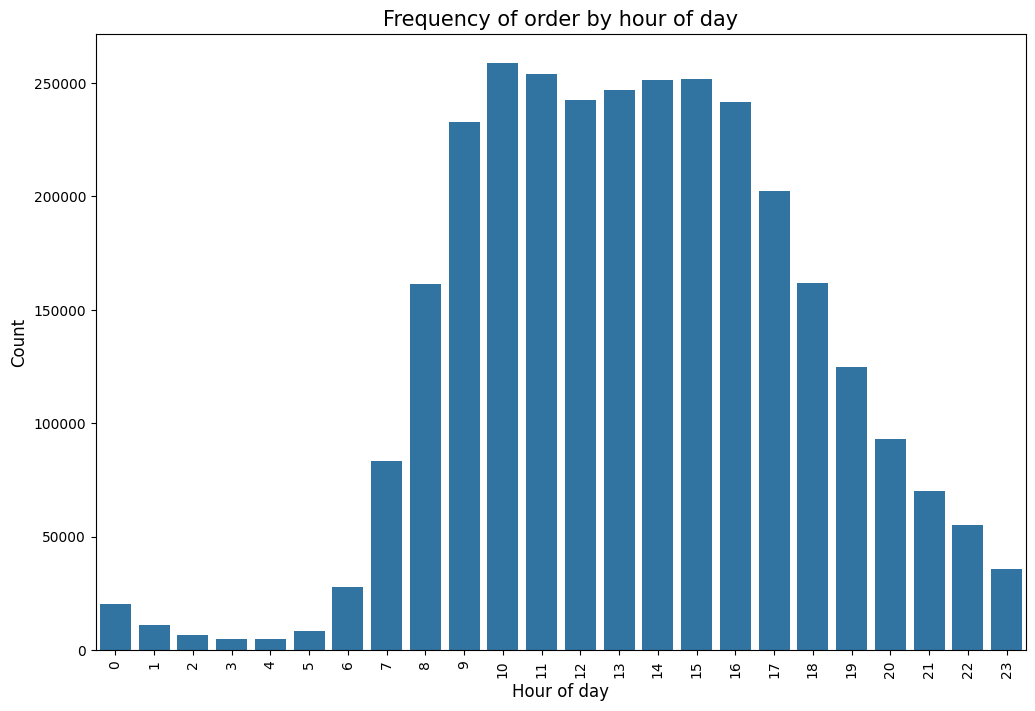

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

orders의 eval타입 분류

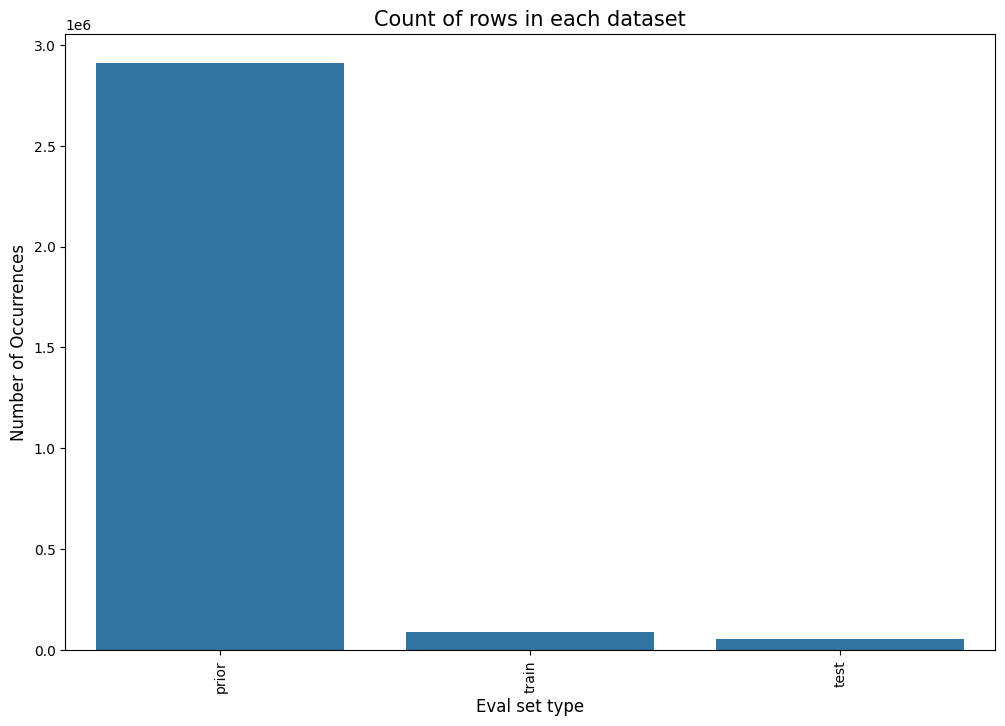

In [53]:
cnt_srs = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

이전 주문 이후 기간(days_since_prior_order)에 따른 주문량

<Figure size 640x480 with 0 Axes>

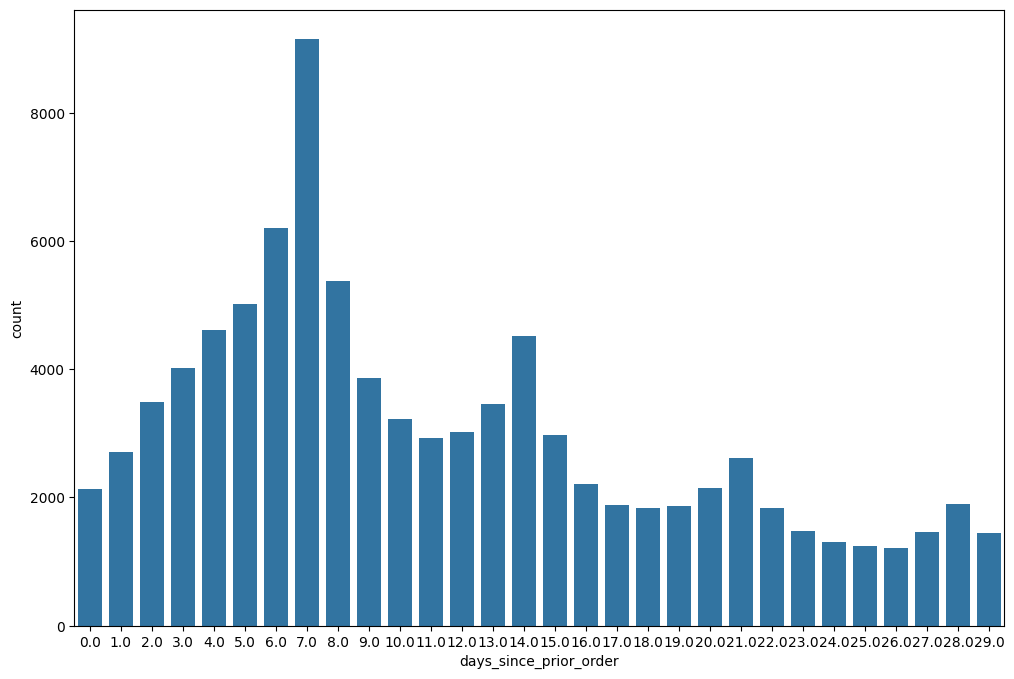

In [54]:
data = orders[orders['eval_set']=='train']
plt.figure()
plt.figure(figsize=(12,8))
sns.countplot(x=data['days_since_prior_order'])
plt.show()

7일마다 구매량이 높아지는 주기성이 보인다.

eval타입에 따른 이전 주문 이후 기간

<Axes: xlabel='days_since_prior_order', ylabel='eval_set'>

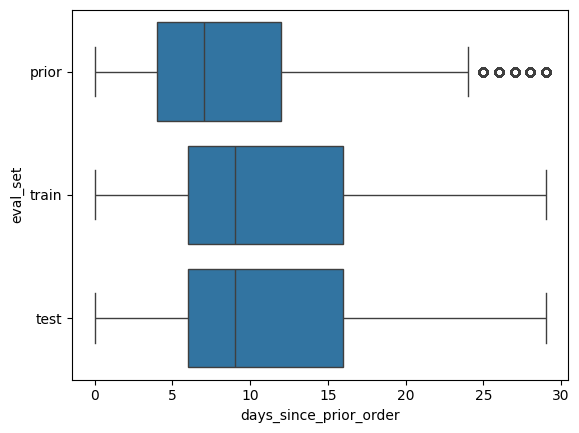

In [55]:
plt.figure()
sns.boxplot(data=orders, x='days_since_prior_order', y='eval_set')

prior의 경우 이전 주문 이후 기간이 짧고, train과 test에서는 상대적으로 길다.
train과 test의 데이터 분산이 비슷하게 그려진다.

이전 주문 이후 기간에 따른 판매량을 재구매 여부로 비교

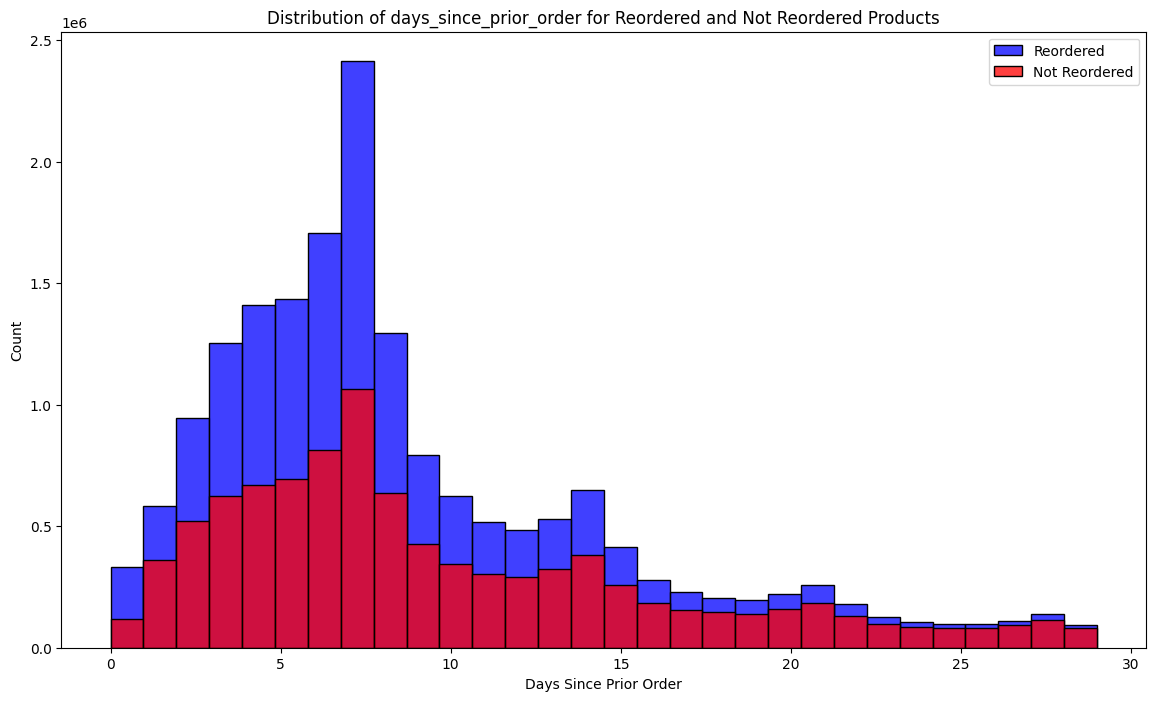

In [56]:
# orders 데이터와 order_products_prior 데이터를 병합
merged_data = pd.merge(order_products__prior, orders, on='order_id')

# 재주문을 하는 고객들의 데이터 필터링
reordered_data = merged_data[merged_data['reordered'] == 1]

# 재주문을 하지 않는 고객들의 데이터 필터링
not_reordered_data = merged_data[merged_data['reordered'] == 0]

# 분포 시각화
plt.figure(figsize=(14, 8))

# 재주문을 하는 고객들의 분포
sns.histplot(reordered_data['days_since_prior_order'], bins=30, color='blue', label='Reordered')
# 재주문을 하지 않는 고객들의 분포
sns.histplot(not_reordered_data['days_since_prior_order'], bins=30, color='red', label='Not Reordered')

plt.title('Distribution of days_since_prior_order for Reordered and Not Reordered Products')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Count')
plt.legend()
plt.show()

이전 주문 이후의 기간과 재구매 여부는 반비례 하는 추세를 볼 수 있었다.

주기성을 설명하기 위해 '7일 간격으로 정기적인 재구매 때문에 주기성을 보인다'고 가정했다.
실제로 이전 주문 이후의 기간이 낮을 경우 주기성이 더 높게 나타나는 그래프를 보였다.
하지만 재구매가 아닌 경우에도 주기성이 나타나기 때문에 다른 요인이 있을거라 생각된다.

요일에 따른 재구매 비율

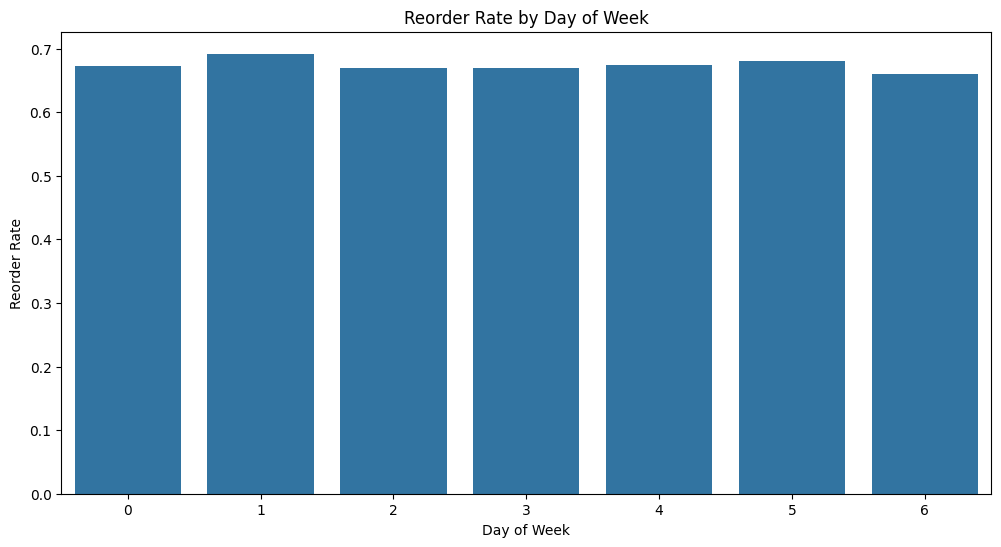

In [60]:
merged_data = pd.merge(order_products__prior, orders, on='order_id')

# 요일별 재구매 비율 계산
reorder_rate_by_dow = merged_data.groupby('order_dow')['reordered'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='order_dow', y='reordered', data=reorder_rate_by_dow)
plt.title('Reorder Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Reorder Rate')
plt.show()

특정 요일에 재구매 비율이 높을것으로 예상했으나 큰 차이를 보이지 않았다.

요일별 재구매 비율은 거의 동일하게 나왔다.
'특정 요일에 재구매가 많아지기 때문에 주기성을 보인다'는 가정도 사실이 아니다.

요일에 따른 주문량

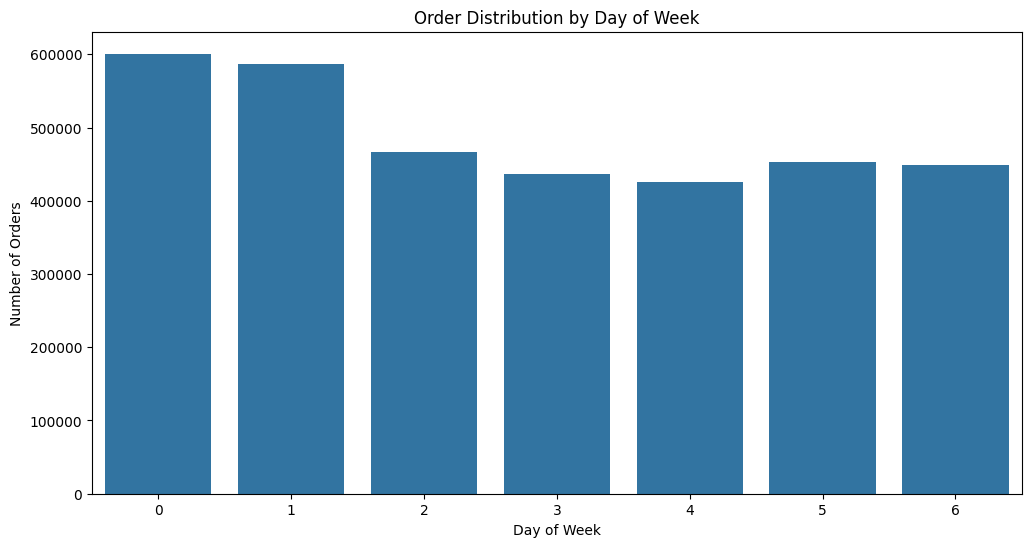

In [8]:
# 요일별 주문 수 계산
orders_by_dow = orders['order_dow'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=orders_by_dow.index, y=orders_by_dow.values)
plt.title('Order Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

특정 요일에 높은 주문량을 보였다.

요일(dow)는 재구매와 낮은 상관관계를 보이고 주문량과 높은 상관관계를 보일것이라 예상된다.

카트추가순서를 재구매여부에 따라 비교

<Axes: xlabel='reordered', ylabel='add_to_cart_order'>

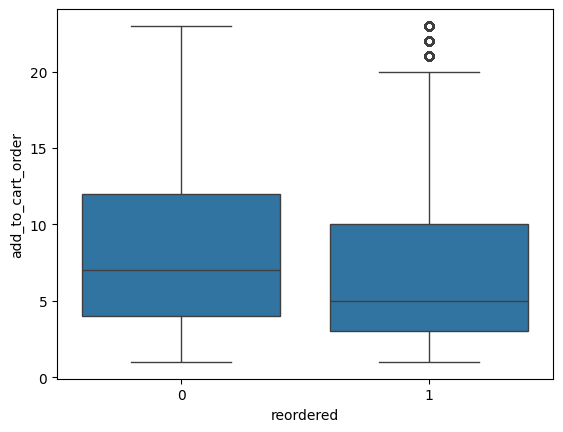

In [46]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# order_hour_of_day 컬럼의 이상치를 제거
orders_no_outliers = remove_outliers(order_products__prior, 'add_to_cart_order')

plt.figure()
sns.boxplot(data=orders_no_outliers, x='reordered', y='add_to_cart_order')

재구매한 제품이 카트에 더 빨리 추가되는 경향이 있음, 이전에 구매했던 제품을 다시 구매할 때, 해당 제품을 더 빨리 선택할 가능성이 높다는 것을 의미

dow=0,1과 나머지의 department에 따른 판매량 비교

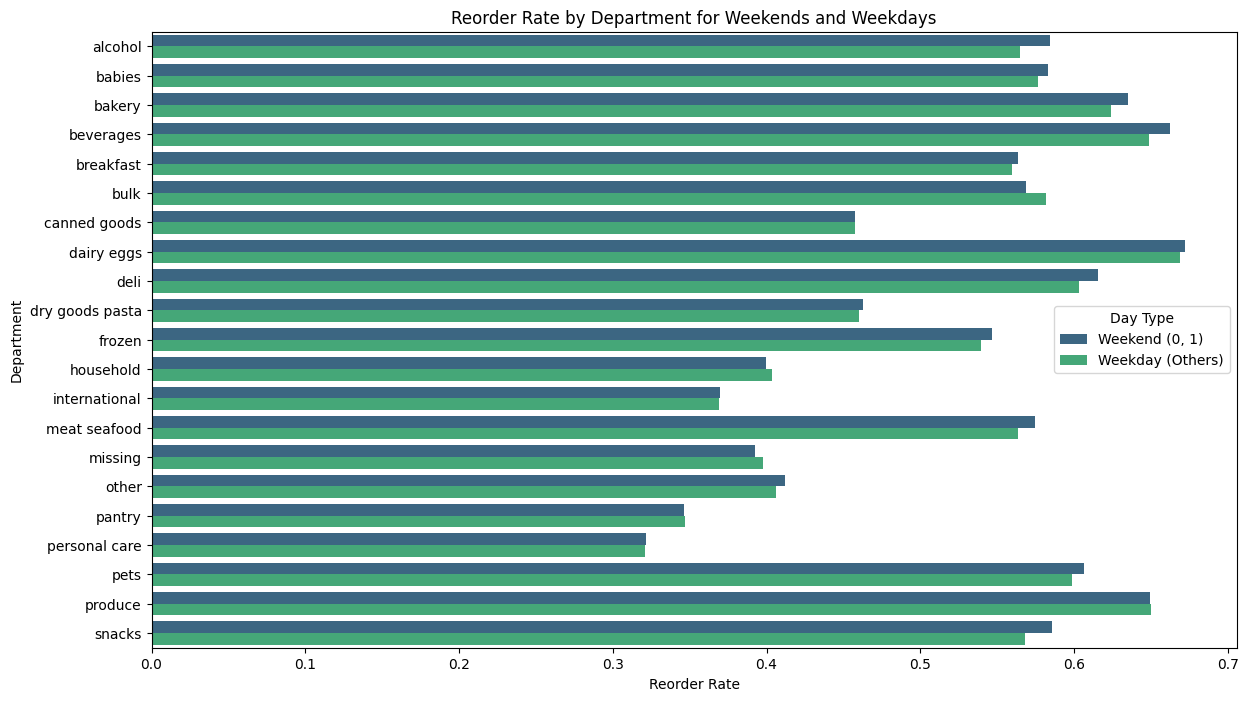

In [13]:
# order_products_prior와 products 데이터를 병합
merged_data = pd.merge(order_products__prior, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')
merged_data = pd.merge(merged_data, departments, on='department_id')
merged_data = pd.merge(merged_data, aisles, on='aisle_id')

# dow가 0, 1일 때의 데이터 필터링
weekend_data = merged_data[merged_data['order_dow'].isin([0, 1])]

# dow가 0, 1일이 아닐 때의 데이터 필터링
weekday_data = merged_data[~merged_data['order_dow'].isin([0, 1])]

# 카테고리별 재구매 비율 계산
weekend_reorder_rate = weekend_data.groupby('department')['reordered'].mean().reset_index()
weekend_reorder_rate.columns = ['department', 'reorder_rate']
weekend_reorder_rate['day_type'] = 'Weekend (0, 1)'

weekday_reorder_rate = weekday_data.groupby('department')['reordered'].mean().reset_index()
weekday_reorder_rate.columns = ['department', 'reorder_rate']
weekday_reorder_rate['day_type'] = 'Weekday (Others)'

# 두 데이터 프레임 병합
reorder_rate = pd.concat([weekend_reorder_rate, weekday_reorder_rate])

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='reorder_rate', y='department', hue='day_type', data=reorder_rate, palette='viridis')
plt.title('Reorder Rate by Department for Weekends and Weekdays')
plt.xlabel('Reorder Rate')
plt.ylabel('Department')
plt.legend(title='Day Type')
plt.show()

dow=0,1과 나머지의 department에 따른 판매비율 비교

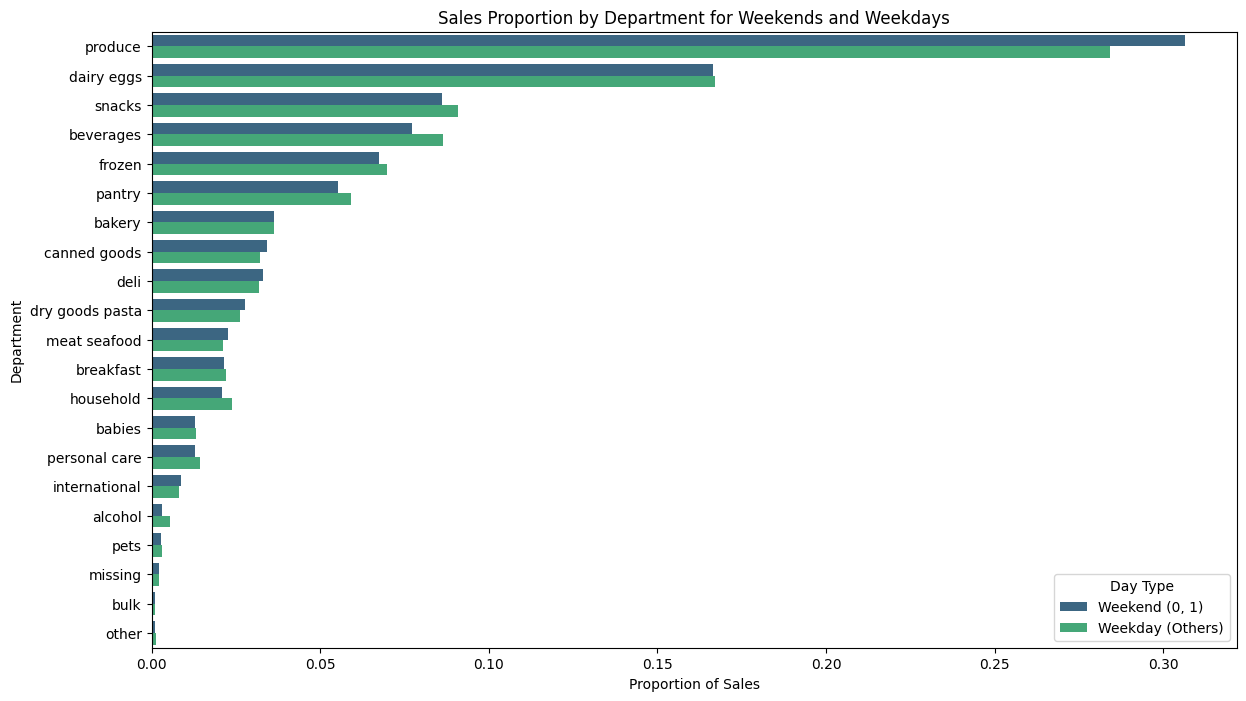

In [16]:
# order_products_prior와 products 데이터를 병합
merged_data = pd.merge(order_products__prior, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')
merged_data = pd.merge(merged_data, departments, on='department_id')
merged_data = pd.merge(merged_data, aisles, on='aisle_id')

# dow가 0, 1, 6일 때의 데이터 필터링
weekend_data = merged_data[merged_data['order_dow'].isin([0, 1])]

# dow가 0, 1, 6일이 아닐 때의 데이터 필터링
weekday_data = merged_data[~merged_data['order_dow'].isin([0, 1])]

# 카테고리별 판매량 계산
weekend_sales = weekend_data['department'].value_counts(normalize=True).reset_index()
weekend_sales.columns = ['department', 'proportion']
weekend_sales['day_type'] = 'Weekend (0, 1)'

weekday_sales = weekday_data['department'].value_counts(normalize=True).reset_index()
weekday_sales.columns = ['department', 'proportion']
weekday_sales['day_type'] = 'Weekday (Others)'

# 두 데이터 프레임 병합
sales_data = pd.concat([weekend_sales, weekday_sales])

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='proportion', y='department', hue='day_type', data=sales_data, palette='viridis')
plt.title('Sales Proportion by Department for Weekends and Weekdays')
plt.xlabel('Proportion of Sales')
plt.ylabel('Department')
plt.legend(title='Day Type')
plt.show()

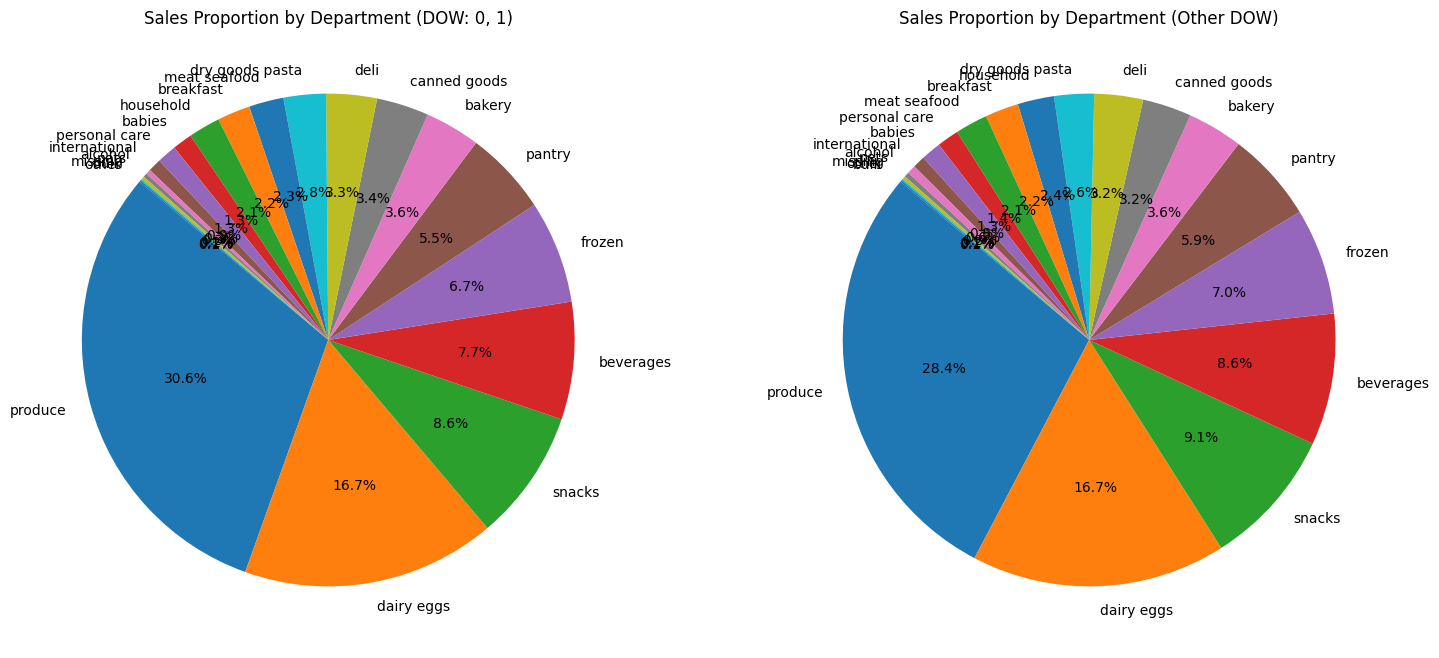

In [17]:
# order_products_prior와 products 데이터를 병합
merged_data = pd.merge(order_products__prior, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')
merged_data = pd.merge(merged_data, departments, on='department_id')
merged_data = pd.merge(merged_data, aisles, on='aisle_id')

# dow가 0, 1일 때의 데이터 필터링
weekend_data = merged_data[merged_data['order_dow'].isin([0, 1])]

# dow가 0, 1일이 아닐 때의 데이터 필터링
weekday_data = merged_data[~merged_data['order_dow'].isin([0, 1])]

# 카테고리별 판매 비율 계산
weekend_sales = weekend_data['department'].value_counts(normalize=True).reset_index()
weekend_sales.columns = ['department', 'proportion']

weekday_sales = weekday_data['department'].value_counts(normalize=True).reset_index()
weekday_sales.columns = ['department', 'proportion']

# 파이 차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 차트 (dow가 0, 1일 때)
axes[0].pie(weekend_sales['proportion'], labels=weekend_sales['department'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Sales Proportion by Department (DOW: 0, 1)')

# 두 번째 차트 (나머지 요일)
axes[1].pie(weekday_sales['proportion'], labels=weekday_sales['department'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Sales Proportion by Department (Other DOW)')

plt.show()

dow와 특정한 department의 주문량이 상관관계를 보인다.

그러나 dow와 department의 재주문 비율의 경우는 큰 상과관계가 없어 보인다.

order_id에서 reordered 및 department간 상관관계 분석

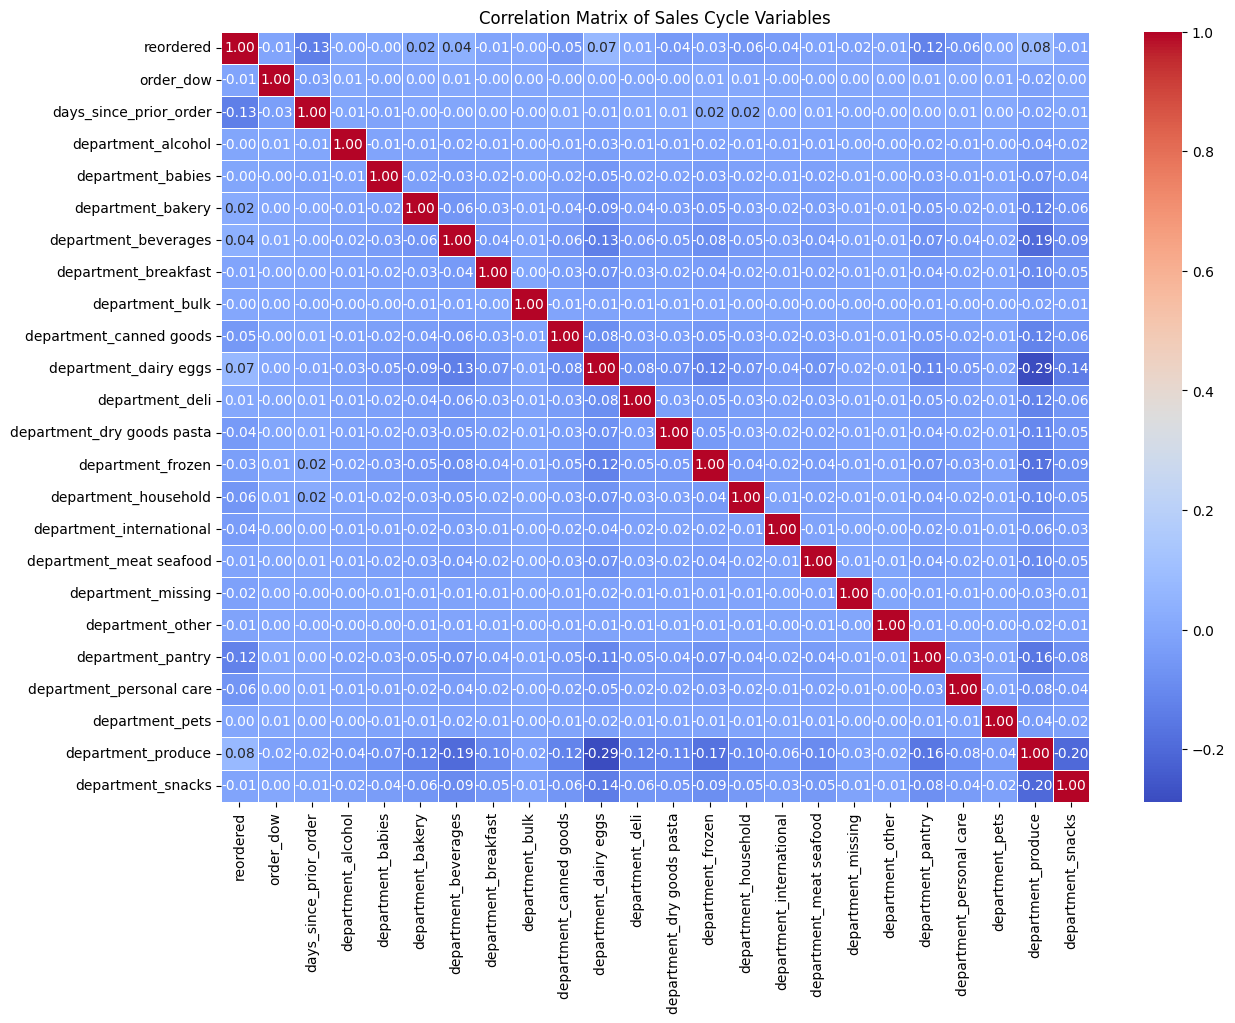

In [6]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()

# order_products_prior와 products 데이터를 병합
merged_data = pd.merge(order_products__prior, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')
merged_data = pd.merge(merged_data, departments, on='department_id')


scaled_data = minMaxScaler.fit_transform(merged_data[['order_dow', 'days_since_prior_order']])
merged_data[['order_dow', 'days_since_prior_order']] = scaled_data


# 필요한 컬럼만 선택
data_for_corr = merged_data[['reordered', 'days_since_prior_order', 'department']]

# 각 department를 범주형 변수로 변환하여 더미 변수 생성
data_for_corr = pd.get_dummies(data_for_corr, columns=['department'])

# 상관관계 행렬 계산
correlation_matrix = data_for_corr.corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sales Cycle Variables')
plt.show()

order_id에서 department의 상관관계

In [ ]:
merged_data = pd.merge(order_products__prior, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')
merged_data = pd.merge(merged_data, departments, on='department_id')

# 각 order_id에 포함된 department 인코딩
order_department = merged_data[['order_id', 'department']].drop_duplicates()
order_department_encoded = pd.get_dummies(order_department, columns=['department'])

# order_id별로 인코딩된 department 집계
order_department_encoded = order_department_encoded.groupby('order_id').max().reset_index()

# 상관관계 행렬 계산
correlation_matrix = order_department_encoded.drop(columns=['order_id']).corr()

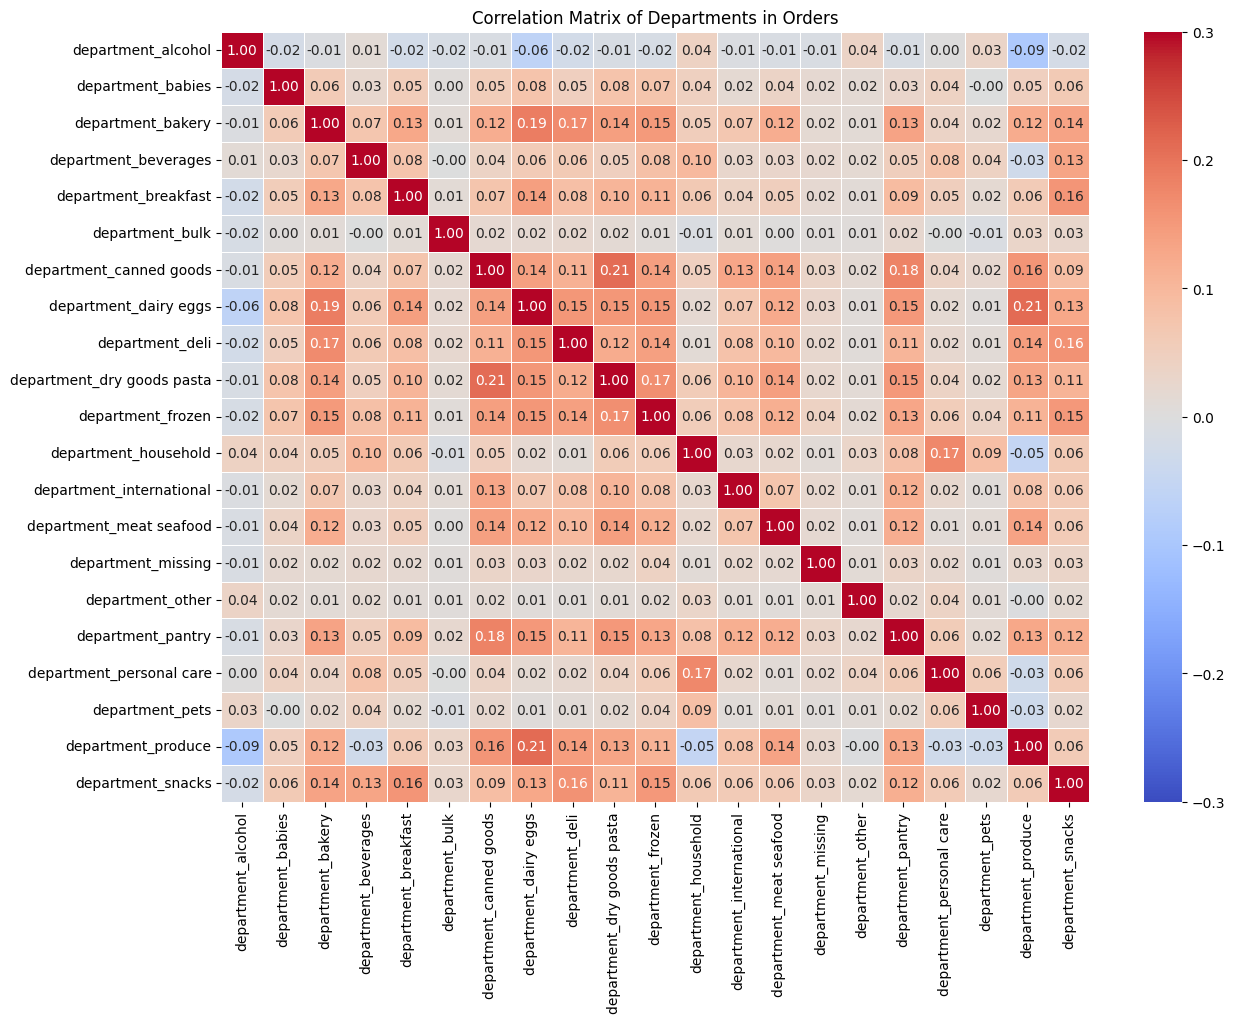

In [26]:
# 상관관계 행렬 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-0.3, vmax=0.3, center=0)
plt.title('Correlation Matrix of Departments in Orders')
plt.show()

상관관계를 보이는 products 출력

In [38]:
# 상관계수가 높은 값의 index와 column명을 출력
def get_top_correlations(correlation_matrix, n=5):
    corr_pairs = correlation_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs != 1]  # 자기 자신과의 상관관계는 제외
    top_corr_pairs = corr_pairs.sort_values(ascending=False).head(n*2)
    return top_corr_pairs.drop_duplicates()

# 상관계수가 낮은 값의 index와 column명을 출력
def get_low_correlations(correlation_matrix, n=5):
    corr_pairs = correlation_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs != 1]  # 자기 자신과의 상관관계는 제외
    top_corr_pairs = corr_pairs.sort_values().head(n*2)
    return top_corr_pairs.drop_duplicates()

In [41]:
print('top correlations :')
print(get_top_correlations(correlation_matrix))
print('low correlations :')
print(get_low_correlations(correlation_matrix))

top correlations :
department_produce          department_dairy eggs      0.211838
department_dry goods pasta  department_canned goods    0.209212
department_bakery           department_dairy eggs      0.188341
department_pantry           department_canned goods    0.180905
department_personal care    department_household       0.173526
dtype: float64
low correlations :
department_produce        department_alcohol   -0.093420
department_dairy eggs     department_alcohol   -0.061510
department_household      department_produce   -0.052145
department_produce        department_pets      -0.032203
department_personal care  department_produce   -0.030425
dtype: float64


order_id당 products_id의 개수

/var/folders/jn/pcxw8mj91c5bx41mmkp91rf80000gn/T/ipykernel_7473/1712964613.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_count', y='frequency', data=product_count_distribution, palette='viridis')


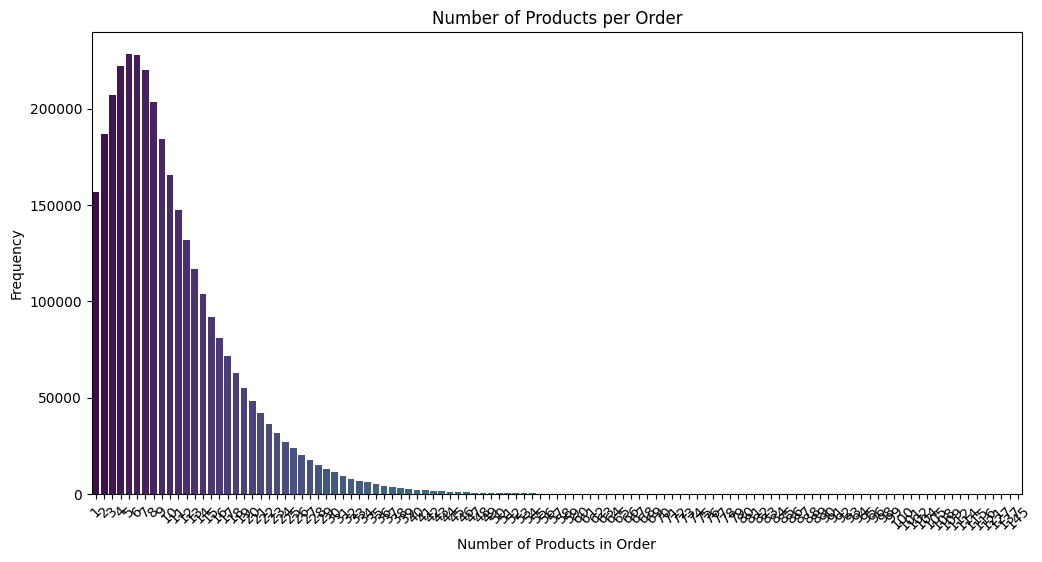

In [10]:
# order_id당 product_id의 개수 계산
order_product_counts = order_products__prior.groupby('order_id')['product_id'].count().reset_index()
order_product_counts.columns = ['order_id', 'product_count']

# product_count의 분포 계산
product_count_distribution = order_product_counts['product_count'].value_counts().reset_index()
product_count_distribution.columns = ['product_count', 'frequency']
product_count_distribution = product_count_distribution.sort_values(by='product_count')

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='product_count', y='frequency', data=product_count_distribution, palette='viridis')
plt.title('Number of Products per Order')
plt.xlabel('Number of Products in Order')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

user_id로 사용자는 206209명인걸 알 수 있다.

In [31]:
# days_sinse_prior_order의 nan값은 206209개
orders.isna().sum()
# user_id의 값도 206209개
len(orders['user_id'].unique())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

## 전처리

1. orders를 user_id 기준 (prior, train), (prior, test)로 분할

In [77]:
user_train = orders[orders['eval_set'] == 'train']['user_id'].unique()
orders_train = orders[orders['user_id'].isin(user_train)]
orders_test = orders[~orders['user_id'].isin(user_train)]

orders_train

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [93]:
orders_products = pd.concat([order_products__prior, order_products__train]).reset_index(drop=True)
orders_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [100]:
# o_train = pd.merge(orders_train, orders_products, on='order_id')
# o_train['days_since_prior_order'].fillna()
o_train

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
22026603,272231,206209,train,14,6,14,30.0,40603,4,0
22026604,272231,206209,train,14,6,14,30.0,15655,5,0
22026605,272231,206209,train,14,6,14,30.0,42606,6,0
22026606,272231,206209,train,14,6,14,30.0,37966,7,0


### o_train
- **명목 척도**:
  - `order_id`
  - `user_id`
  - `eval_set`
  - `product_id`

- **서열 척도**:
  - `order_number`

- **비율 척도**:
  - `order_dow`
  - `order_hour_of_day`
  - `days_since_prior_order`
  - `add_to_cart_order`
  - `reordered`

In [101]:
o_train.iloc[:5000000, :].to_csv('./o_train.csv')

In [102]:
o_train = o_train.iloc[:5000000, :]